Рассматриваем следующий процесс: заявители регистрируются на сайте Тинькофф Квест, где указывают свой возраст. Всех зарегистрированных называем клиентами.

В дальнейшем кто-то из них совершает с созданного аккаунта покупки сертификатов на квест. Будем называть это утилизацией. Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.
В приложенном файле таблица со следующими полями:

client_id -- id клиента, зарегистрированного на сайте
birth_dt -- дата его рождения
reg_dttm -- дата и время регистрации на сайте данного клиента
purchase_id -- id покупки
purchase_dt -- дата покупки
purchase_amt -- сумма покупки


Если данные по покупке пустые -- клиент не совершил утилизации.

## Постройте диаграмму (или график), которая показывает, как менялось множество клиентов по возрасту с течением времени.

In [144]:
import pandas as pd

In [3]:
df = pd.read_excel('1-43a9e0c3-25b8-4b18-af1b-258eee3ed597.xls')
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


Добавим столбец "возраст" клиента к дате оформления.

In [23]:
f = lambda row: pd.to_datetime(row['reg_dttm']).year - pd.to_datetime(row['birth_dt']).year - \
    ((pd.to_datetime(row['reg_dttm']).month, pd.to_datetime(row['reg_dttm']).day) < \
     (pd.to_datetime(row['birth_dt']).month, pd.to_datetime(row['birth_dt']).day))

df['age'] = df.loc[:, ['birth_dt', 'reg_dttm']].apply(f, axis=1)
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,age
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN,10,28
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN,23,48
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,1,27
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN,27,33
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN,3,27
...,...,...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN,5,28
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0,6,27
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0,2,25
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN,15,20


In [24]:
df.dtypes

client_id                int64
birth_dt        datetime64[ns]
reg_dttm        datetime64[ns]
purchase_id            float64
purchase_dt     datetime64[ns]
purchase_amt           float64
reg_date                 int64
age                      int64
dtype: object

В нашем датасете максимальный год совпадает с минимальным и равен 2019. Это упрощает задачу рассмотрения количества клиентов на временном интервале.

In [27]:
max(pd.to_datetime(df['reg_dttm']).dt.year)

2019

Добавим столбец "месяц оформления" для последующей группировки с категорией возраста.

In [28]:
df['reg_month'] = pd.to_datetime(df['reg_dttm']).dt.month
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,age,reg_month
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN,10,28,1
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN,23,48,1
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,1,27,1
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN,27,33,1
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN,3,27,1
...,...,...,...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN,5,28,4
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0,6,27,4
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0,2,25,4
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN,15,20,4


Затем добавим непосредственно столбец "категория возраста". Категории были разделены на возраста 20 и меньше, 21-30, 31-40, 41-50, 50+.

In [35]:
def age_categories(column):
    if column > 50:
        return '50+'
    elif column <= 50 and column > 40:
        return '41-50'
    elif column <= 40 and column > 30:
        return '31-40'
    elif column <= 30 and column > 20:
        return '21-30'
    else:
        return '20-'
df['age_cat'] = df['age'].apply(age_categories)
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,age,reg_month,age_cat
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN,10,28,1,21-30
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN,23,48,1,41-50
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,1,27,1,21-30
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN,27,33,1,31-40
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN,3,27,1,21-30
...,...,...,...,...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN,5,28,4,21-30
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0,6,27,4,21-30
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0,2,25,4,21-30
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN,15,20,4,20-


Произведем группировку столбцов "месяц оформления" и "категория возраста" для построения графиков.

In [53]:
grouped = df.groupby(['reg_month', 'age_cat'])
grouped.size()

reg_month  age_cat
1          20-        137
           21-30      295
           31-40      159
           41-50       77
           50+         42
2          20-        240
           21-30      371
           31-40      184
           41-50       99
           50+         48
3          20-        186
           21-30      309
           31-40      116
           41-50       41
           50+         22
4          20-         17
           21-30       26
           31-40        6
           41-50        2
dtype: int64

Далее запишем в списки значения частот для каждой из категории (количество клиентов).

In [98]:
cat_1 = [] # 20-
cat_2 = [] # 21-30
cat_3 = [] # 31-40
cat_4 = [] # 41-50
cat_5 = [] # 50+
for i in range(0, 13):
    cat_1.append(0)
    cat_2.append(0)
    cat_3.append(0)
    cat_4.append(0)
    cat_5.append(0)

In [99]:
for groups, info in grouped:
    if groups[1] == '20-':
        cat_1[groups[0] - 1] = (grouped.size()[groups[0]][groups[1]])
    elif groups[1] == '21-30':
        cat_2[groups[0] - 1] = (grouped.size()[groups[0]][groups[1]])
    elif groups[1] == '31-40':
        cat_3[groups[0] - 1] = (grouped.size()[groups[0]][groups[1]])
    elif groups[1] == '41-50':
        cat_4[groups[0] - 1] = (grouped.size()[groups[0]][groups[1]])
    elif groups[1] == '50+':
        cat_5[groups[0] - 1] = (grouped.size()[groups[0]][groups[1]])

In [102]:
print(cat_1)
print(cat_2)
print(cat_3)
print(cat_4)
print(cat_5)

[137, 240, 186, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[295, 371, 309, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[159, 184, 116, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[77, 99, 41, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[42, 48, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[137, 240, 186, 17]

Построим столбчатые диаграммы для 1-4 месяцев.

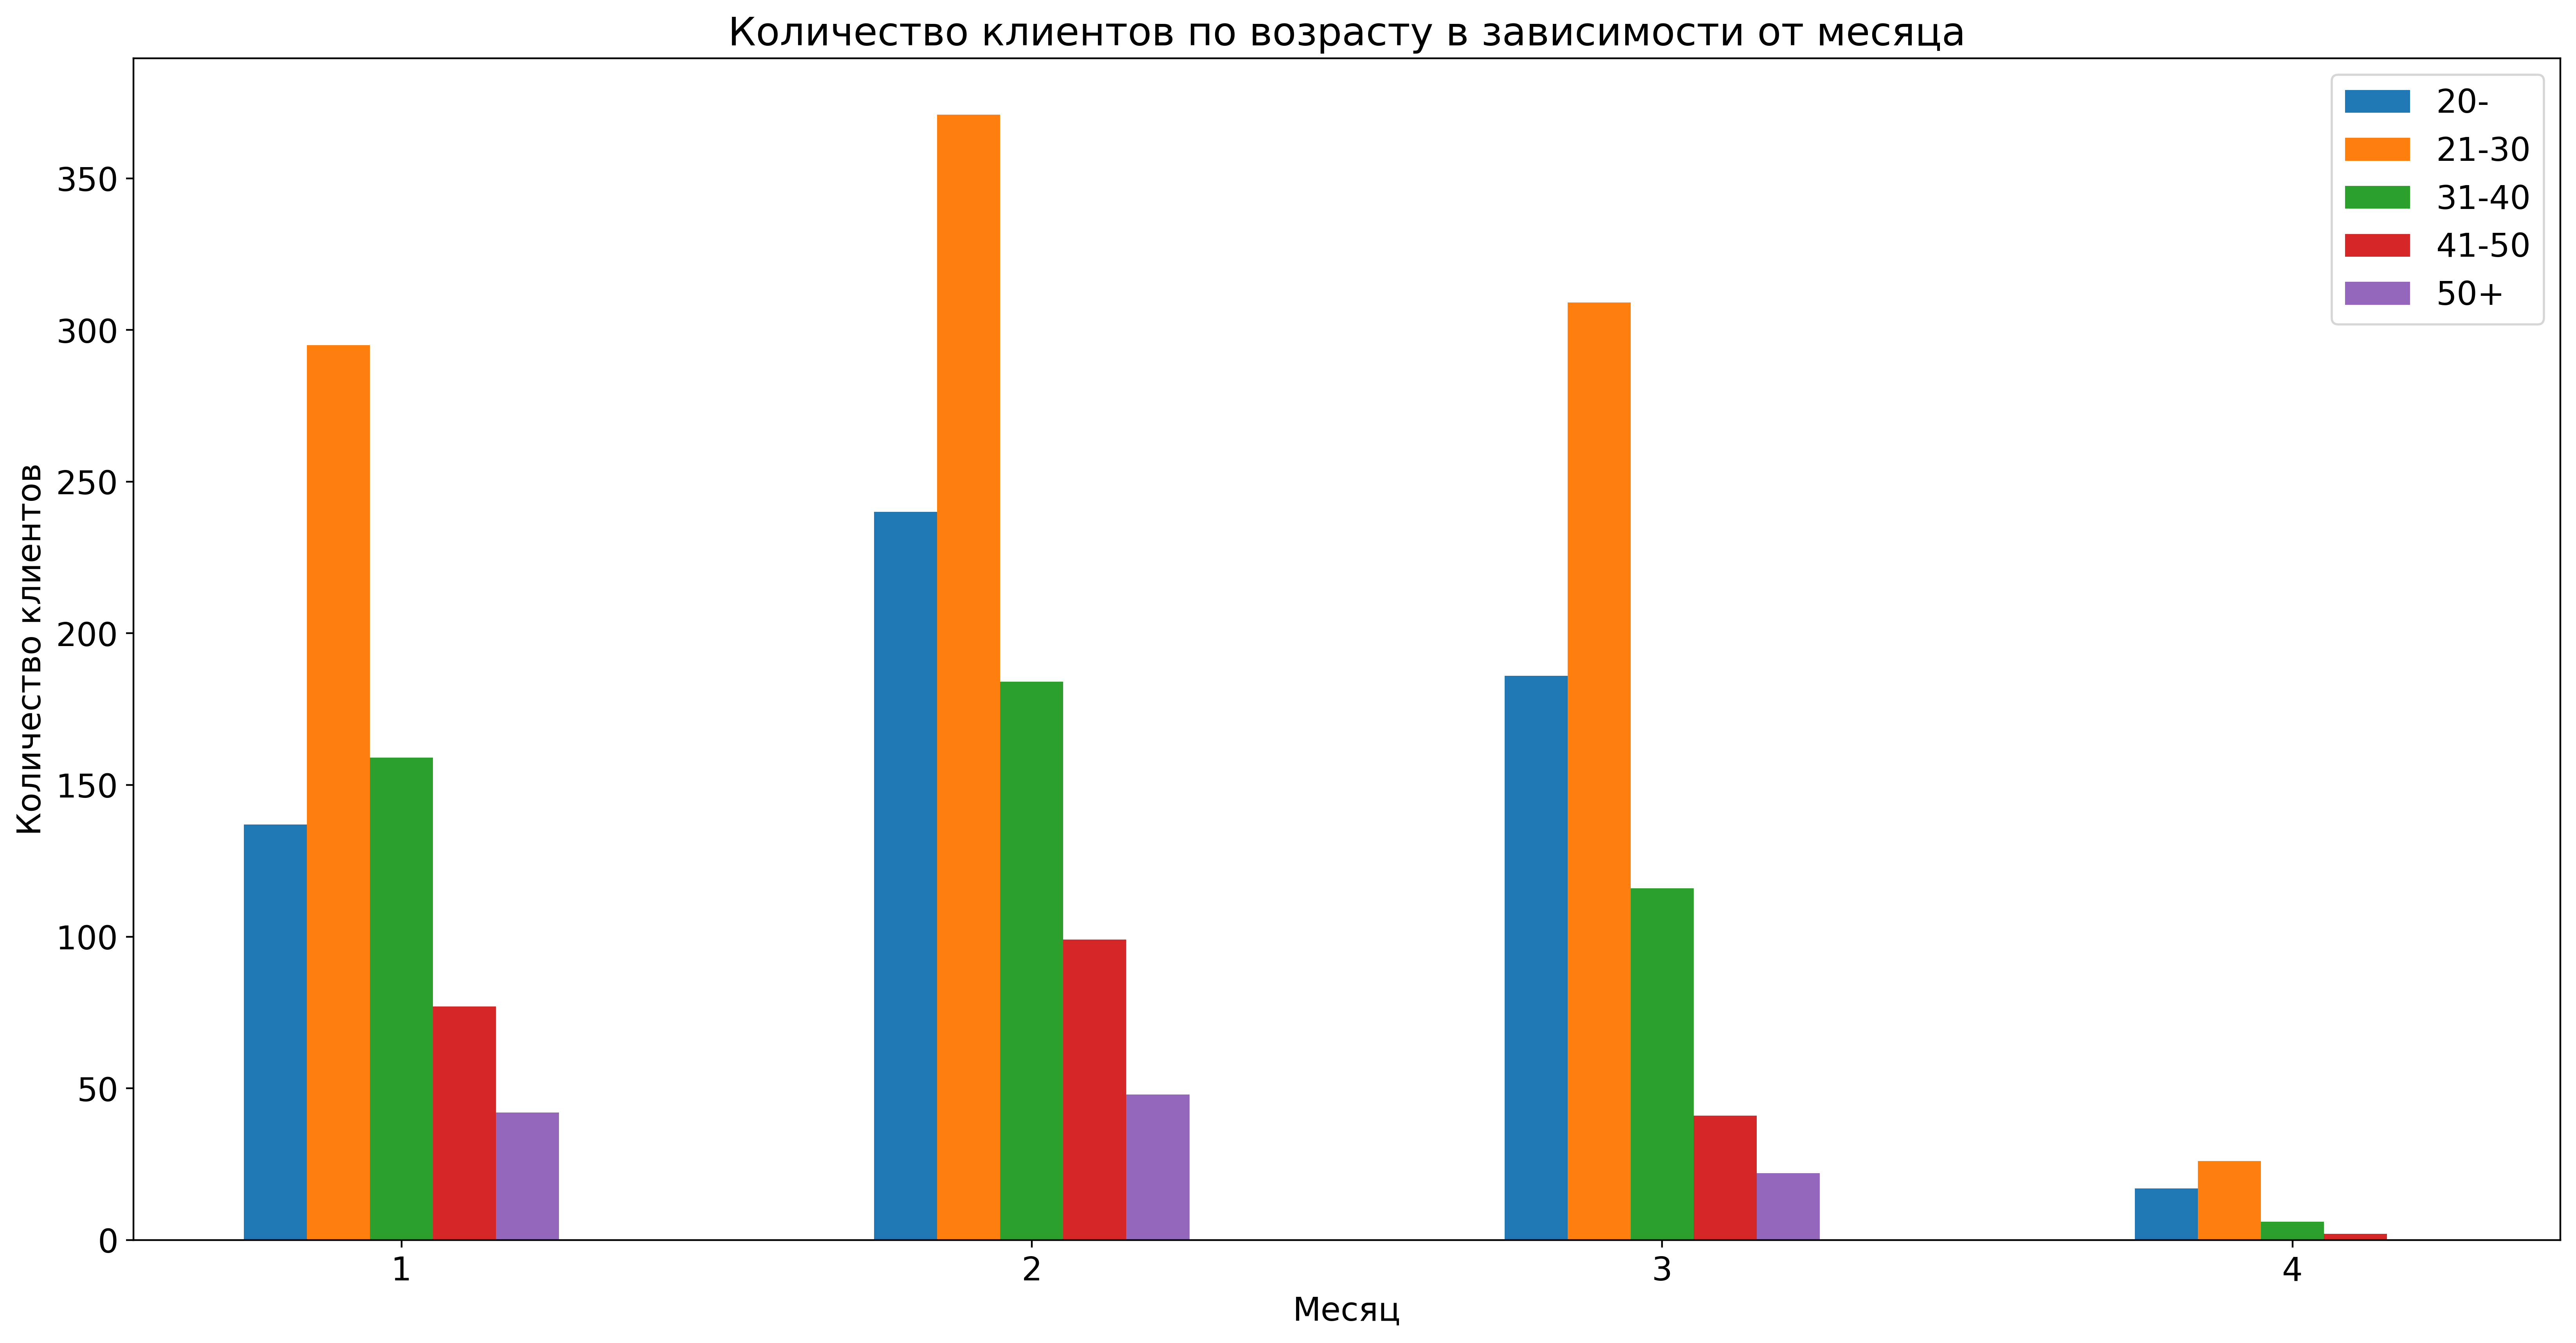

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

x_labels = np.array([1, 2, 3, 4])
cat_1 = cat_1[:4]
cat_2 = cat_2[:4]
cat_3 = cat_3[:4]
cat_4 = cat_4[:4]
cat_5 = cat_5[:4]
width = 0.10

plt.rcParams.update({'font.size': 15})
fg = Figure(figsize=(20,10), dpi=400)
ax = fg.gca()
ax.bar(x_labels-0.20, cat_1, width, label='20-')
ax.bar(x_labels-0.10, cat_2, width, label='21-30')
ax.bar(x_labels, cat_3, width, label='31-40')
ax.bar(x_labels+0.10, cat_4, width, label='41-50')
ax.bar(x_labels+0.20, cat_5, width, label='50+')
ax.legend()
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество клиентов')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title('Количество клиентов по возрасту в зависимости от месяца')
fg

## Постройте диаграмму (или график), которая показывает, как по возрастным сегментам отличается конверсия в утилизацию.

Скопируем старый датафрейм для того, чтобы удалить в нем NaN-значения (клиенты без покупок сертификатов на квест, т. е., без утилизации).

In [148]:
df_new = df

In [149]:
df_new = df_new.dropna(axis=0)
df_new

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,age,reg_month,age_cat
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,1,27,1,21-30
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,22,25,1,21-30
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,27,48,1,41-50
13,820607,1970-09-27,2019-01-05 07:54:45,1.243945e+09,2019-03-09,1500.0,27,48,1,41-50
14,820628,2000-09-08,2019-01-06 12:54:53,1.231402e+09,2019-02-27,500.0,8,18,1,20-
...,...,...,...,...,...,...,...,...,...,...
2366,835253,2000-01-12,2019-04-03 09:07:49,1.290068e+09,2019-04-03,500.0,12,19,4,20-
2368,835470,1998-07-24,2019-04-04 16:10:45,1.296849e+09,2019-04-05,3500.0,24,20,4,20-
2371,835526,1989-12-25,2019-04-04 18:39:24,1.294306e+09,2019-04-04,3500.0,25,29,4,21-30
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0,6,27,4,21-30


Произведем группировку и подсчет количества людей на этапе "оформил" и на этапе "утилизировал".

In [155]:
grouped_util = df_new.groupby('age_cat')
grouped_util.size()

age_cat
20-      337
21-30    491
31-40    233
41-50    117
50+       61
dtype: int64

In [157]:
grouped_total = df.groupby('age_cat')
grouped_total.size()

age_cat
20-       580
21-30    1001
31-40     465
41-50     219
50+       112
dtype: int64

Построим необходиый график.

In [158]:
util = []
total = []
for i in range(0, 5):
    util.append(grouped_util.size()[i])
    total.append(grouped_total.size()[i])

[337, 491, 233, 117, 61]

Text(0.5, 1.0, 'Конверсия оформлений в утилизацию')

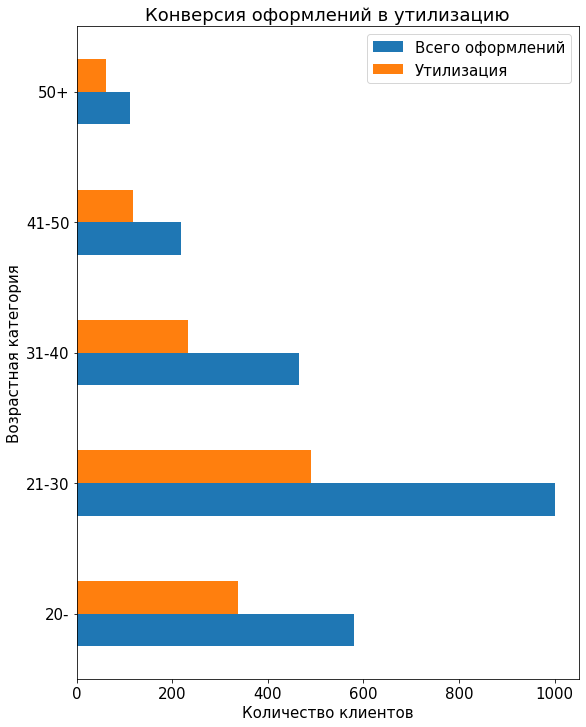

In [180]:
conv_plot_data = pd.DataFrame({'Всего оформлений': total, 'Утилизация': util}, index=x_labels)

ax = conv_plot_data.plot.barh(figsize=(9,12))
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Возрастная категория')
ax.set_title('Конверсия оформлений в утилизацию')

## Постройте диаграмму (или график), которая показывает, как скорость утилизации влияет на размер первой покупки.

In [182]:
df_new.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,age,reg_month,age_cat
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,1,27,1,21-30
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,22,25,1,21-30
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,27,48,1,41-50
13,820607,1970-09-27,2019-01-05 07:54:45,1.243945e+09,2019-03-09,1500.0,27,48,1,41-50
14,820628,2000-09-08,2019-01-06 12:54:53,1.231402e+09,2019-02-27,500.0,8,18,1,20-


In [183]:
df_new['days_to_purchase'] = (df_new['purchase_dt'] - df_new['reg_dttm']).dt.days
df_new

<ipython-input-183-16e8ec02bb10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['days_to_purchase'] = (df_new['purchase_dt'] - df_new['reg_dttm']).dt.days


,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,age,reg_month,age_cat,days_to_purchase
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,1,27,1,21-30,40
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,22,25,1,21-30,39
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,27,48,1,41-50,46
13,820607,1970-09-27,2019-01-05 07:54:45,1.243945e+09,2019-03-09,1500.0,27,48,1,41-50,62
14,820628,2000-09-08,2019-01-06 12:54:53,1.231402e+09,2019-02-27,500.0,8,18,1,20-,51
...,...,...,...,...,...,...,...,...,...,...,...
2366,835253,2000-01-12,2019-04-03 09:07:49,1.290068e+09,2019-04-03,500.0,12,19,4,20-,-1
2368,835470,1998-07-24,2019-04-04 16:10:45,1.296849e+09,2019-04-05,3500.0,24,20,4,20-,0
2371,835526,1989-12-25,2019-04-04 18:39:24,1.294306e+09,2019-04-04,3500.0,25,29,4,21-30,-1
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0,6,27,4,21-30,1


In [184]:
def purchase_days_error(column):
    return column + 1 
df_new['days_to_purchase'] = df_new['days_to_purchase'].apply(purchase_days_error)
df_new

<ipython-input-184-b52a58d2dcfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['days_to_purchase'] = df_new['days_to_purchase'].apply(purchase_days_error)


,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,reg_date,age,reg_month,age_cat,days_to_purchase
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,1,27,1,21-30,41
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,22,25,1,21-30,40
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,27,48,1,41-50,47
13,820607,1970-09-27,2019-01-05 07:54:45,1.243945e+09,2019-03-09,1500.0,27,48,1,41-50,63
14,820628,2000-09-08,2019-01-06 12:54:53,1.231402e+09,2019-02-27,500.0,8,18,1,20-,52
...,...,...,...,...,...,...,...,...,...,...,...
2366,835253,2000-01-12,2019-04-03 09:07:49,1.290068e+09,2019-04-03,500.0,12,19,4,20-,0
2368,835470,1998-07-24,2019-04-04 16:10:45,1.296849e+09,2019-04-05,3500.0,24,20,4,20-,1
2371,835526,1989-12-25,2019-04-04 18:39:24,1.294306e+09,2019-04-04,3500.0,25,29,4,21-30,0
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0,6,27,4,21-30,2


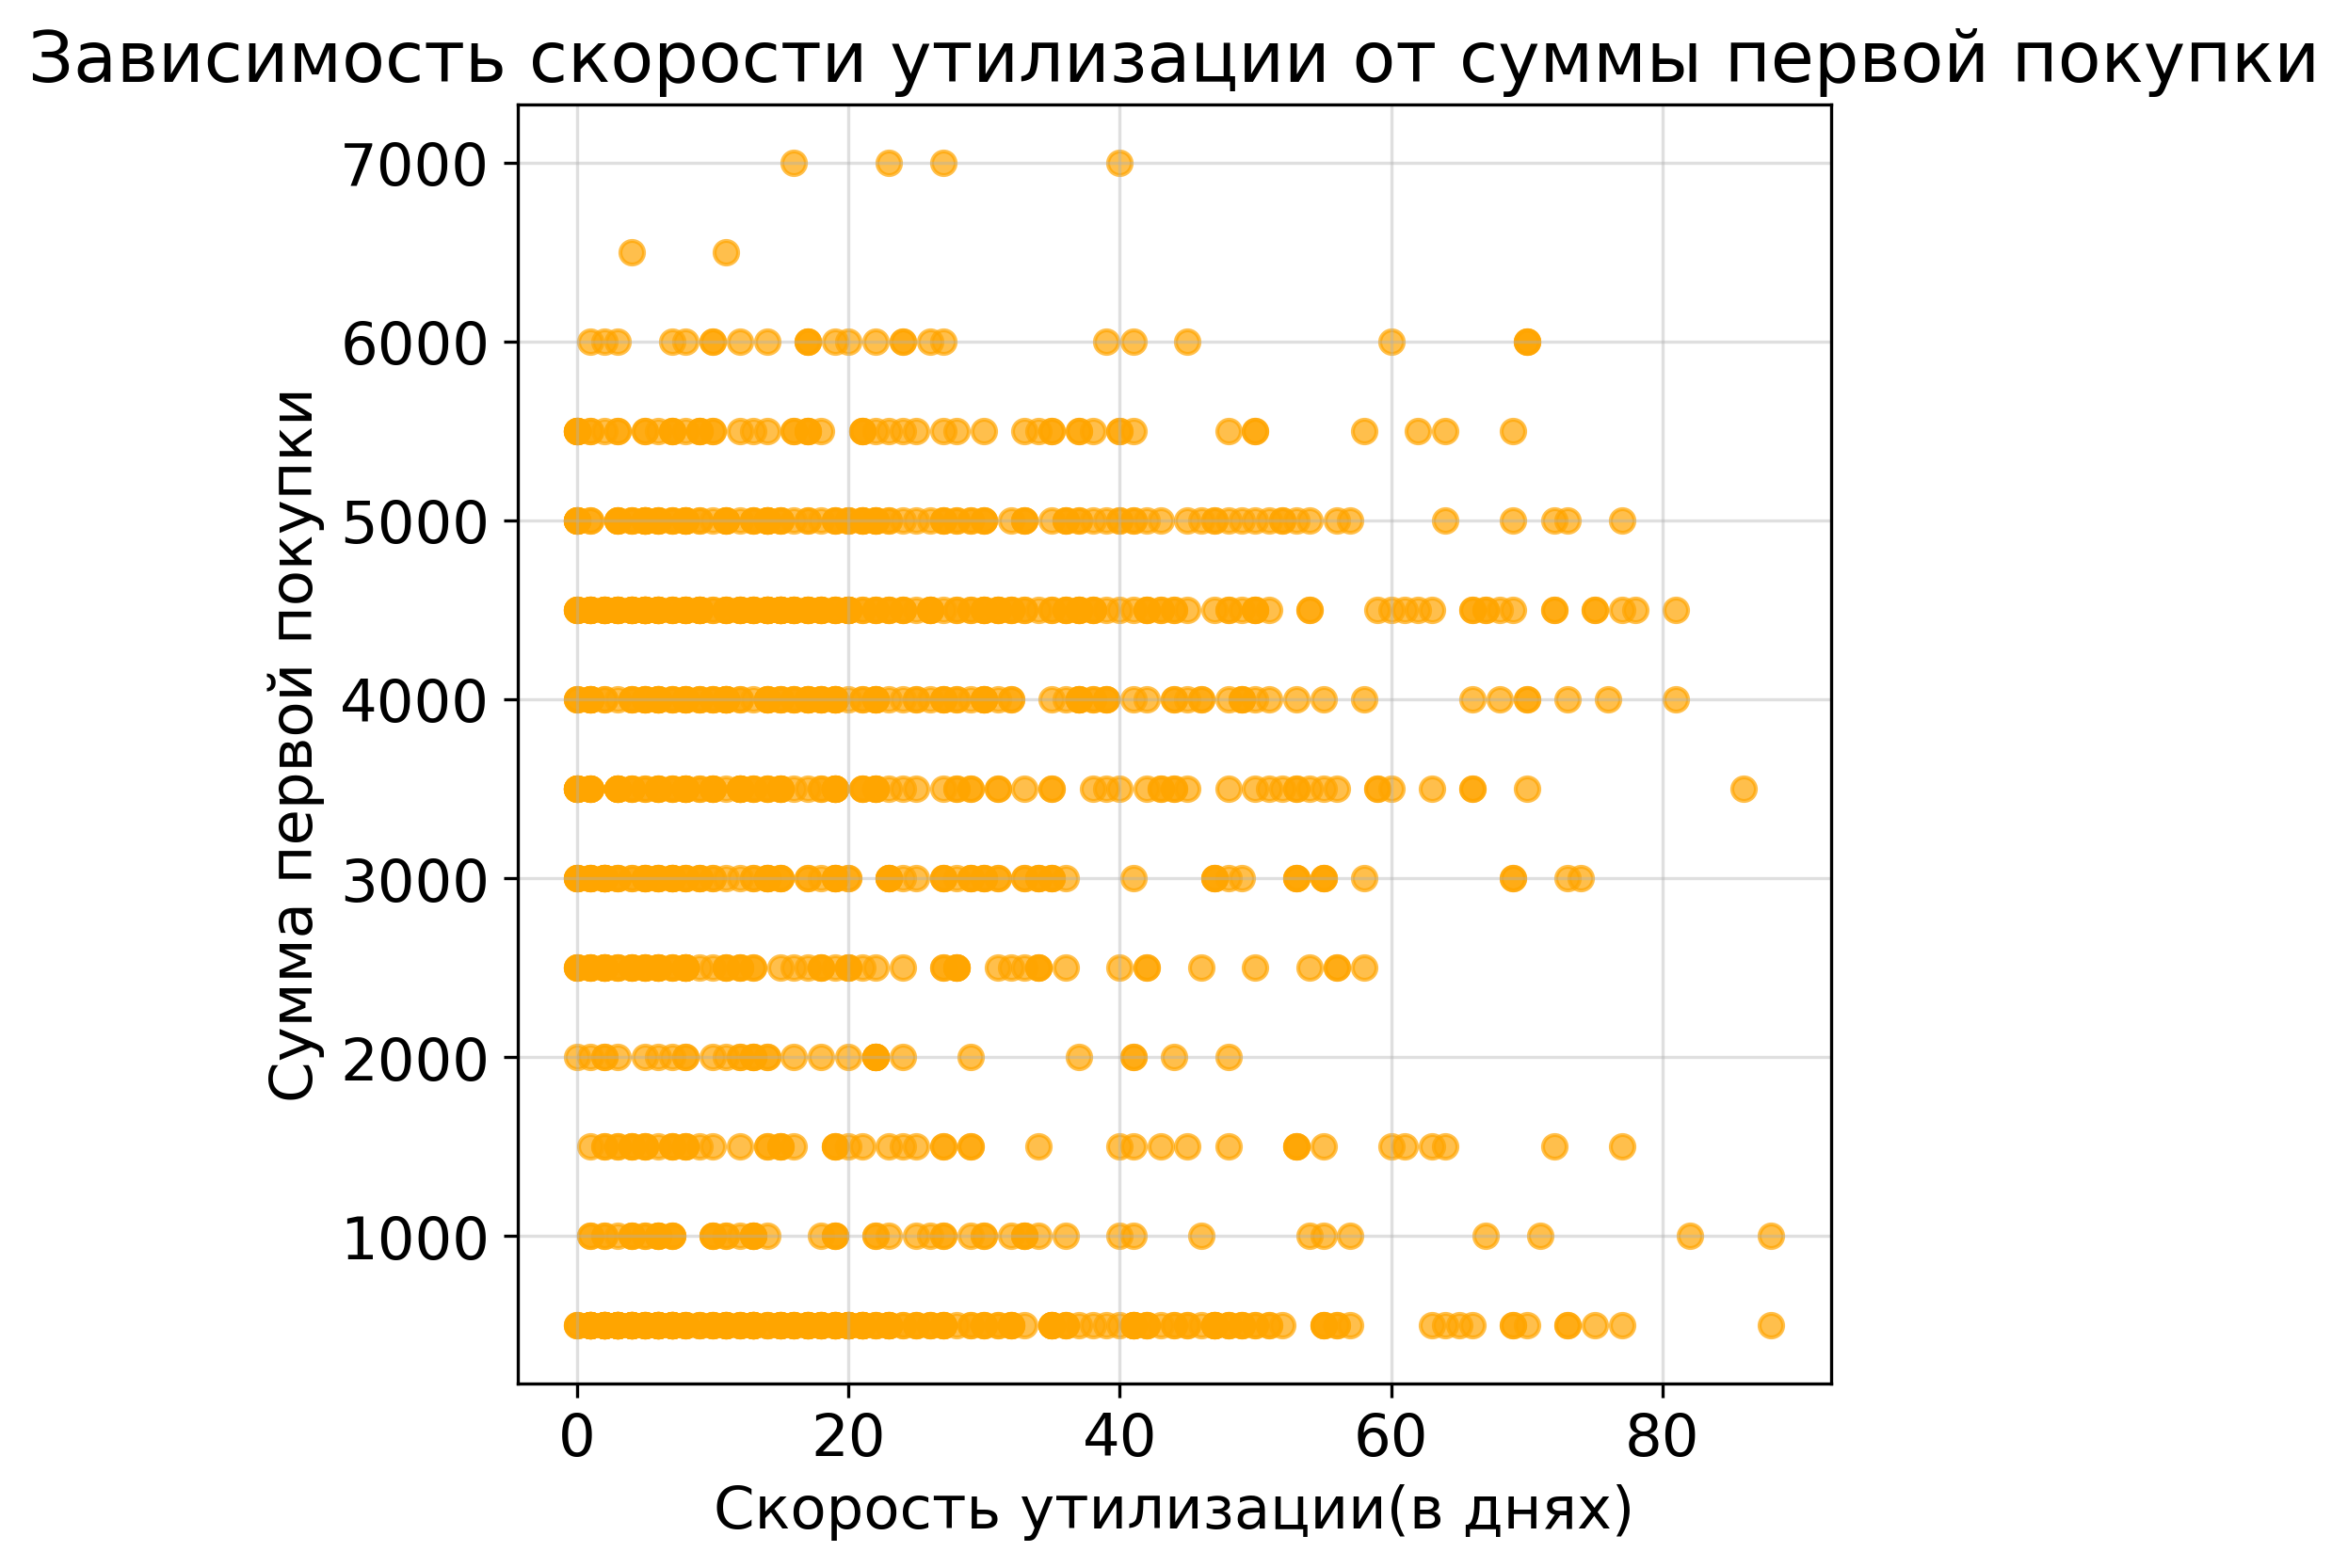

In [189]:
plt.figure(figsize=(6,6), dpi=300)
plt.scatter(df_new['days_to_purchase'], df_new['purchase_amt'], color='orange', alpha=0.7)
plt.xlabel('Скорость утилизации(в днях)')
plt.ylabel('Сумма первой покупки')
plt.title('Зависимость скорости утилизации от суммы первой покупки')
plt.grid(alpha=0.4)